# Donnees non-bruitees

In [13]:
from eautoencoder import *

In [16]:
def test_linear(sigma=0.1, epsilon=0.02, nb_epochs=1000, learning_rate=1e-5):
	# Generation de donnees quelconques
	datax, datay = gen_arti(data_type=0, epsilon=epsilon, sigma=sigma)

	#  Création du réseau
	linear = Linear(datax.shape[1], datay.shape[1])
	mse = MSELoss()

	# Boucle d'apprentissage 
	# Initialisation
	list_loss=[]

	# Boucle d'apprentissage
	for epoch in range(nb_epochs):
		# Forward pass
		yhat = linear.forward(datax)
		average_loss = np.mean(mse.forward(datay, yhat))
			
		# Backward pass
		delta = mse.backward(yhat, datay)
		linear.backward_update_gradient(datax, delta)

		# Mise à jour des paramètres
		linear.update_parameters(learning_rate)
		linear.zero_grad()
		list_loss.append(average_loss)

		if epoch % 100 == 0:
			print("Epoch {}: Loss = {}".format(epoch, average_loss))
	last_loss = np.mean(mse.forward(datay, yhat)) 
	print("Erreur mse :", last_loss)

	w = linear._parameters
	print("Coefficient linéaire prédit : ", w)
	## Visualisation des données et de la frontière de décision pour un vecteur de poids w
	plt.figure()
	plt.title('Frontière de décision pour RNN Lineaire\nnb_epochs ={}, bruits = {}, learning rate = {}'.format(nb_epochs, epsilon, learning_rate))
	plt.xlabel('x')
	plt.ylabel('y')

	plot_frontiere(datax, lambda x : np.sign(x.dot(w)),step=100)
	plot_data(datax,datay)
	plt.figure()

	plt.title('Evolution de la loss')
	plt.plot(np.flip(list_loss), label='loss', c='midnightblue')
	plt.legend()
	plt.xlabel('Nombre d\'itérations')

	###################################
	x_test, y_test = gen_arti(data_type=0, epsilon=epsilon, sigma=sigma)
	y_pred = np.sign(linear.forward(x_test))
	plt.figure()
	plt.title('Frontière de décision pour test avec Accuracy = {}'.format(np.mean(y_test == y_pred)))
	plt.xlabel('x')
	plt.ylabel('y')

	plot_frontiere(x_test, lambda x : np.sign(x.dot(w)),step=100)
	plot_data(x_test, y_pred)
	plt.figure()



Epoch 0: Loss = 3.5426347291207594
Epoch 100: Loss = 0.04616005226558198
Epoch 200: Loss = 0.04538176460605795
Epoch 300: Loss = 0.04530877623995405
Epoch 400: Loss = 0.045259581889504324
Epoch 500: Loss = 0.045226366306563945
Epoch 600: Loss = 0.04520393943249424
Epoch 700: Loss = 0.045188797001259086
Epoch 800: Loss = 0.04517857296276854
Epoch 900: Loss = 0.045171669780483426
Erreur mse : 0.04516704694051981
Coefficient linéaire prédit :  [[0.48707744]
 [0.46768584]]


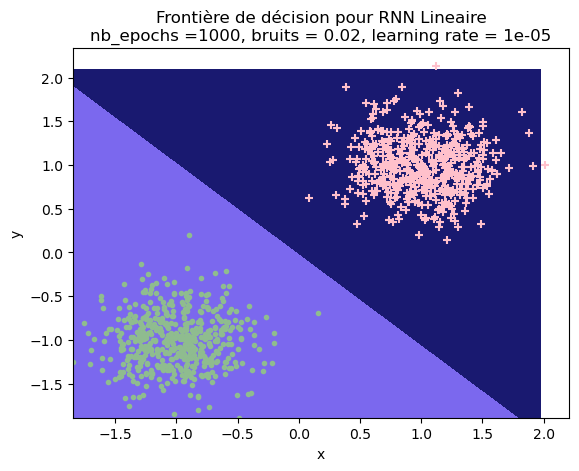

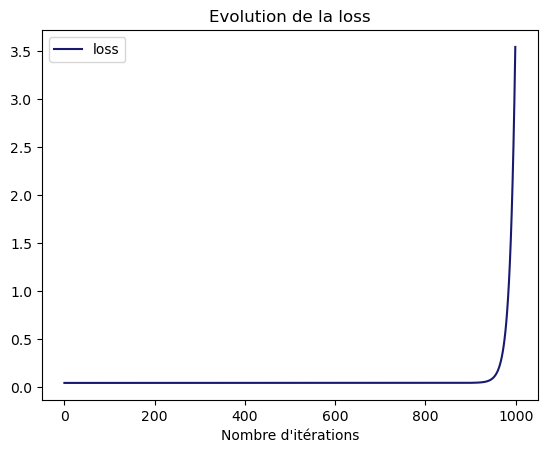

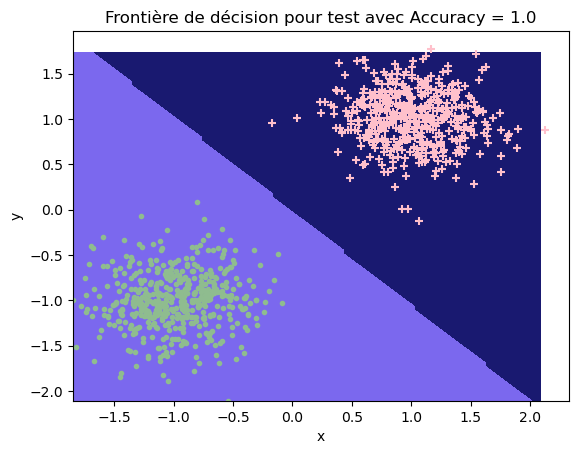

<Figure size 640x480 with 0 Axes>

In [17]:
test_linear()